In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [38]:
df_car_volume = pd.read_csv('D:/regression 2.csv')


## Hypothesis Testing



H0: There is no correlation between average income per capita and the number of cars sold.<br>
H1: There is a correlation between average income per capita and the number of cars sold.<br>

|r| < 0.1: very weak correlation<br>
|r| < 0.3: weak correlation<br>
|r| < 0.5: moderate correlation<br>
|r| ≥ 0.5: strong correlation<br>

alpha = 0.05<br>
    => if p-value < 0.05<br>&ensp;
        => Reject H0, Accept H1, and vice versa.<br>&ensp;

In [49]:
from scipy.stats import chi2_contingency
from scipy import stats

r, pvalue = stats.pearsonr(df_car_volume['GDP'],df_car_volume['Sale in 1000s'])

if pvalue > 0.05:
    print(f'r = {r}, P-value ={pvalue}')
    print('Accept H0')
else:
    print(f'r = {r}, P-value ={pvalue}')
    print('Accept H1')

r = 0.7475824959380948, P-value =0.012926247717142654
Accept H1



Hypothesis testing shows that there is a positive correlation when the P-value < 0.05, and there is a very strong correlation, with r = 0.74, between the number of cars sold and GDP per capita in Vietnam. <br>

However, according to data from VAMA, by the end of 2023, the total car sales in Vietnam reached 301,989 units of all types (excluding sales from VinFast and Hyundai), a decrease of about 25% compared to the same period in 2022. So, we will delve deeper into the correlation and the reasons for the decline in sales despite the increase in GDP.

## Regression Analysis

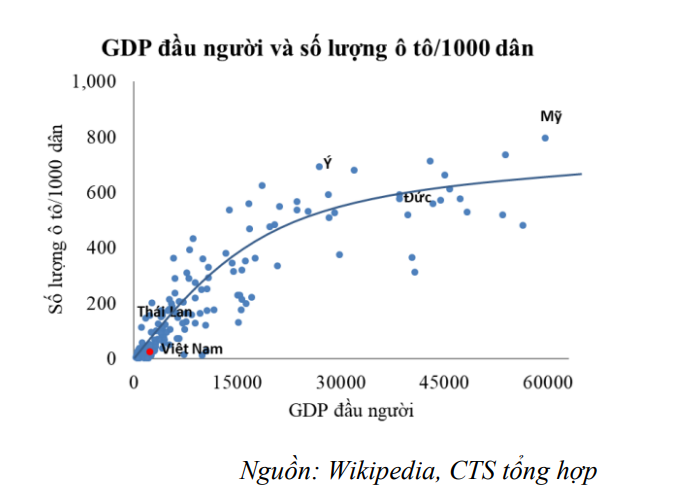

C:\Users\x1\AppData\Local\Temp\ipykernel_5380\4011860561.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


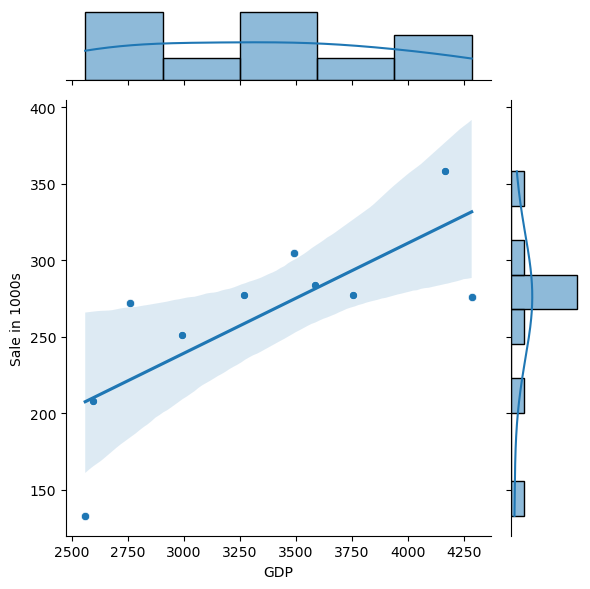

In [40]:
g = sns.jointplot(data =df_car_volume,x='GDP',y='Sale in 1000s', scatter = False, kind='reg')
sns.scatterplot(data =df_car_volume,x='GDP',y='Sale in 1000s', ax=g.ax_joint)
plt.tight_layout()



Although there is a correlation between GDP and car consumption, in reality, the income of people has increased, but the desire to spend on purchasing cars in 2023 has not been clearly reflected. It is clear that there is a correlation between car consumption and GDP per capita and the number of cars per 1,000 people in different countries. Currently, Vietnam is still in the early stages of the growth cycle. <br>

To explain this, the sharp decline in car purchases in 2023 is due to the real estate and stock markets not yet recovering, and bank interest rates decreasing from 12% to 5%. Notably, in previous years, when deposit interest rates fell, deposit amounts also decreased because they had to compete with other attractive investment channels such as real estate, stocks, gold, and foreign currencies. However, in the context where many investment channels are “frozen” or difficult to profit from, savings deposits have been chosen by investors as a safe place, with deposits increasing by 11% compared to the same period. With such cautious spending behavior after the real estate and stock market bubbles, it can be seen that this is the main reason from 2022 affecting the sale volume of the automobile industry in 2023. <br>

Another significant factor impacting domestic car consumption is that consumers are "waiting" for the reduction of registration fees for domestically assembled cars in 2024, making them more cautious in spending during a difficult economic period.

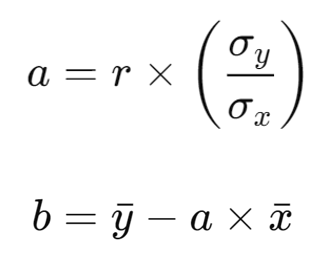

In [45]:

# Standard deviation and Mean
r = 0.7475824959380948
std_x = df_car_volume['GDP'].std()
std_y = df_car_volume['Sale in 1000s'].std()
mean_x = df_car_volume['GDP'].mean()
mean_y = df_car_volume['Sale in 1000s'].mean()

# caculating a & b
a = r * (std_y / std_x)
b = mean_y - a * mean_x

print("Slope:", a)
print("Intercept:", b)
print(f'Linear function: y = {a}x + {b}')



Slope: 0.07187686992669744
Intercept: 23.643119347226417
Linear function: y = 0.07187686992669744x + 23.643119347226417


In [48]:
# Recheck the result with another method
from sklearn.linear_model import LinearRegression

# Create model
model = LinearRegression()
model.fit(df_car_volume[['GDP']], df_car_volume['Sale in 1000s'])

# Get the coefficient
a = model.coef_[0]
b = model.intercept_

print("Slope:", a)
print("Intercept:", b)
print(f'Linear function: y = {a}x + {b}')


Slope: 0.07187686992669741
Intercept: 23.643119347226502
Linear function: y = 0.07187686992669741x + 23.643119347226502


Based on the linear function, it can be estimated that whenever GDP per capita increases by 1%, car consumption also increases by approximately 1%. <br>

According to the linear relationship between GDP per capita and the number of cars per 1,000 people in different countries, it can be seen that when Vietnam’s economy reaches a certain level of development, the correlation between car consumption will be weaker than it is now. However, that time is still far from happening.

